# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
date = 'December 13, 2020'
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df = {'Lat': [], 'Lon': [], 'City': [], 'Country': [] , 'Description': [], 'Temp': [], 'Pressure': [],
      'Humidity': [], 'Windspeed': [], 'Cloud Cover': [] }

count = 1
for city in cities:
    
    res = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
    if res.status_code == 404:
        print(f'#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!\n{city} not found by OpenWeatherAPI\n#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!')
        continue
    print(f'Processing city {count}: {city}')
    
    
    lat = res.json()['coord']['lat']
    lon = res.json()['coord']['lon']
#You guys forgot to tell us to keep track of the country... super annoying. We need this for the next activity
#I had to go back and redo this - complete waste of time. 

    country = citipy.nearest_city(lat, lon).country_code
    desc = res.json()['weather'][0]['description']
    temp = res.json()['main']['temp_max']
    press = res.json()['main']['pressure']
    humid = res.json()['main']['humidity']
    wind = res.json()['wind']['speed']
    cloud = res.json()['clouds']['all']
    lst = [lat, lon, city, country, desc, temp, press, humid, wind, cloud]
    
    
    i = 0
    for key in df.keys():
        
        df[key].append(lst[i])
        i += 1
    count += 1
        


Processing city 1: martapura
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
tsihombe not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 2: rocha
Processing city 3: staroutkinsk
Processing city 4: ushuaia
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
karaul not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 5: bredasdorp
Processing city 6: margate
Processing city 7: yerbogachen
Processing city 8: east london
Processing city 9: road town
Processing city 10: jamestown
Processing city 11: goderich
Processing city 12: chitral
Processing city 13: cape town
Processing city 14: kitgum
Processing city 15: saint-philippe
Processing city 16: tuktoyaktuk
Processing city 17: butaritari
Processing city 18: barrow
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
taolanaro not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 19: pisco
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
nizhneyansk not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 20: srednekolymsk
Processing c

#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
chagda not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 204: edd
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
galiwinku not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 205: kovur
Processing city 206: gushikawa
Processing city 207: sao miguel do araguaia
Processing city 208: tamandare
Processing city 209: la vista
Processing city 210: kibaya
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
meyungs not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 211: mangaratiba
Processing city 212: salinopolis
Processing city 213: gunnedah
Processing city 214: laguna
Processing city 215: gbarnga
Processing city 216: saint-augustin
Processing city 217: vanimo
Processing city 218: leningradskiy
Processing city 219: fort frances
Processing city 220: ahipara
Processing city 221: honiara
Processing city 222: bethel
Processing city 223: monrovia
Processing city 224: walvis bay
Processing city 225: clyde river
Processing city 226: e

#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
skovde not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 421: meulaboh
Processing city 422: naustdal
Processing city 423: abu samrah
Processing city 424: haysville
Processing city 425: bilibino
Processing city 426: campbell river
Processing city 427: alta floresta
Processing city 428: grand haven
Processing city 429: huaicheng
Processing city 430: ewa beach
Processing city 431: tara
Processing city 432: chapais
Processing city 433: ngama
Processing city 434: emba
Processing city 435: ulcinj
Processing city 436: nang rong
Processing city 437: viseu
Processing city 438: makakilo city
Processing city 439: batemans bay
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
kuche not found by OpenWeatherAPI
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
Processing city 440: novyy urengoy
Processing city 441: abu dhabi
Processing city 442: yagodnoye
Processing city 443: palana
Processing city 444: altud
Processing city 445: oranjemund
Processing city 446: taoudenni
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame(df)
df.to_csv('..//' + output_data_file)


In [5]:
len(df['Humidity'])

566

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



In [8]:
df = df[df['Humidity'] < 100]
df
# Why would I make a separate dataframe? This implies that I have some use for the dirty_city_data. I don't.

,Lat,Lon,City,Country,Description,Temp,Pressure,Humidity,Windspeed,Cloud Cover
0,-3.42,114.85,martapura,id,few clouds,75.20,1010,94,2.24,20
1,-34.48,-54.33,rocha,uy,overcast clouds,60.71,1011,79,6.85,100
2,57.23,59.33,staroutkinsk,ru,overcast clouds,6.40,1037,94,9.19,99
3,-54.80,-68.30,ushuaia,ar,light rain,44.60,983,75,18.34,40
4,-34.53,20.04,bredasdorp,za,scattered clouds,57.20,1011,87,3.36,46
...,...,...,...,...,...,...,...,...,...,...
561,42.80,93.45,hami,cn,clear sky,10.44,1039,73,3.71,0
562,40.80,-124.16,eureka,us,overcast clouds,50.00,1019,94,1.99,100
563,-45.87,-67.50,comodoro rivadavia,ar,clear sky,62.60,999,36,25.28,0
564,61.99,-49.67,paamiut,gl,overcast clouds,22.84,1011,93,41.25,100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

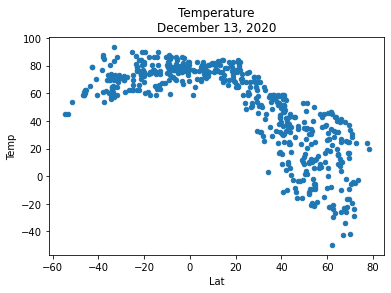

In [9]:
df.plot(kind='scatter', x='Lat', y='Temp')
plt.title('Temperature' + '\n' + date)
plt.savefig('../output_data/Temp.png', facecolor='white')
plt.show()
#This code visualizes the relationship between physical location and temperature

## Latitude vs. Humidity Plot

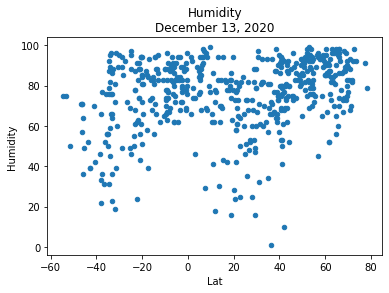

In [10]:
df.plot(kind='scatter', x='Lat', y='Humidity')
plt.title('Humidity' + '\n' + date)
plt.savefig('../output_data/Humidity.png', facecolor='white')
plt.show()
#This code visualizes the relationship between physical location and wetness

## Latitude vs. Cloudiness Plot

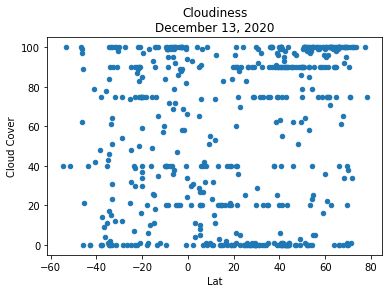

In [11]:
df.plot(kind='scatter', x='Lat', y='Cloud Cover')
plt.savefig('../output_data/Clouds.png', facecolor='white')
plt.title('Cloudiness' + '\n' + date)
plt.show()
#This code visualizes the relationship between physical location and cloud cover

## Latitude vs. Wind Speed Plot

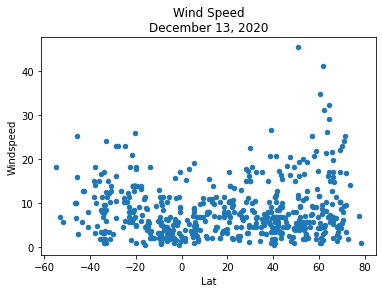

In [12]:
df.plot(kind='scatter', x='Lat', y='Windspeed')
plt.savefig('../output_data/Wind.png', facecolor='white')
plt.title('Wind Speed' + '\n' + date)
plt.show()
#This code visualizes the relationship between physical location and Wind Speed

## Linear Regression

In [13]:
north = df[df['Lat'] >= 0]
south = df[df['Lat'] < 0]


####  Northern Hemisphere - Temp vs. Latitude Linear Regression

In [14]:
# regression Function
def regress(hemisphere, col):
    y = hemisphere[col]
    x = hemisphere['Lat']
    model = linregress(x, y)
    slope = model[0]
    intercept = model[1]
    predictions = [slope * exog + intercept for exog in x]
    hemisphere.plot(kind='scatter', x='Lat', y=col)
    plt.plot(hemisphere['Lat'], predictions)
    
    
    # Check hemisphere
    if hemisphere.iloc[0]['Lat'] >= 0:
        title = f'north_{col}_regression.png'
    else:
        title = f'south_{col}_regression.png'
    plt.title(title[:-4] + '\n' + date)
    fig = plt.gcf()
    fig.savefig('../output_data/regressions/' + title, facecolor='white')
    
    plt.show()
    

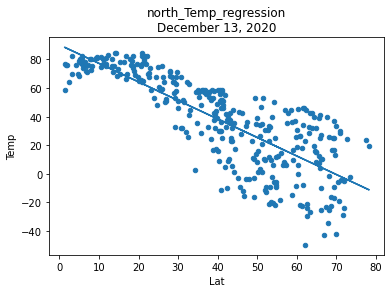

In [15]:
regress(north, 'Temp')

Takeaway: As you get further north you get from the equator, the temperature is expected to drop

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

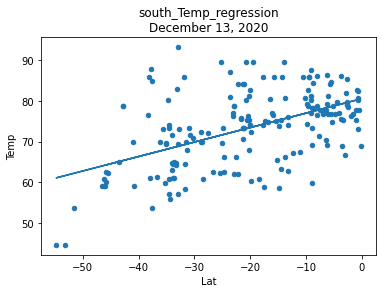

In [16]:
regress(south, 'Temp')

Takeaway: As you get further south you get from the equator, the temperature is expected to drop

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

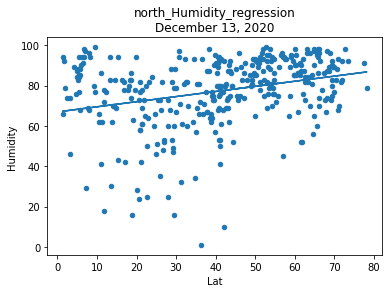

In [17]:
regress(north, 'Humidity')

Taekaway: As you get further north from the equator, humidity is expected to rise

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

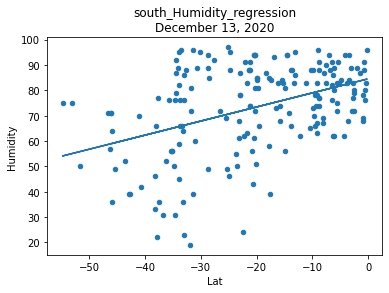

In [18]:
regress(south, 'Humidity')

Takeaway: As you get further south from the equator, humidity is expected to drop

Unlike temperature, which varies directly with the *absolute value* of latitude, humidity just varies directly with latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

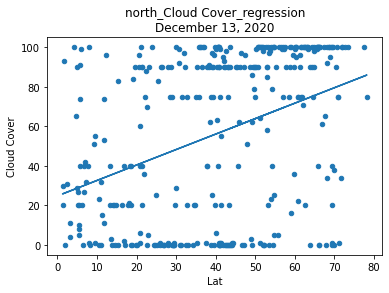

In [19]:
regress(north, 'Cloud Cover')

Taekaway: As you get further north from the equator, you are expected to see more clouds

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

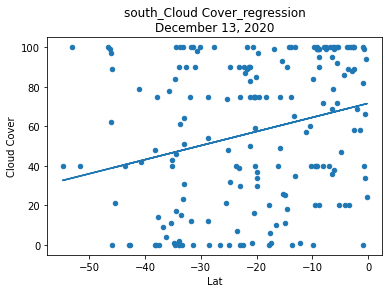

In [20]:
regress(south, 'Cloud Cover')

Takeaway: As you get further south from the equator, you are expected to see fewer clouds

Again, we see that clouds vary directly with latitude, not with latitude's absolute value

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

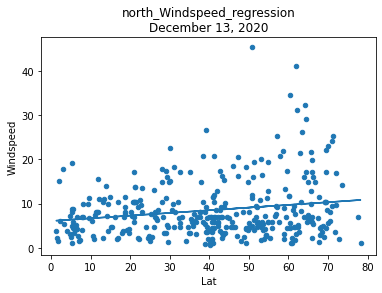

In [21]:
regress(north, 'Windspeed')

Takeaway: In the northern hemisphere, windspeed does not seem to depend very much on latitude

There is a slight upward trend

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

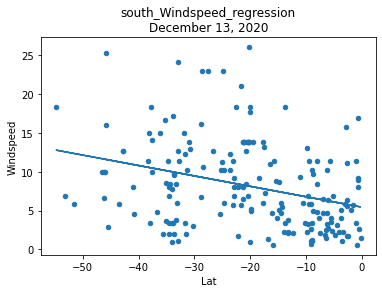

In [22]:
regress(south, 'Windspeed')

{'coord': {'lon': -114.32, 'lat': 43.52},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 21.02,
  'feels_like': 14.27,
  'temp_min': 19,
  'temp_max': 23,
  'pressure': 1019,
  'humidity': 92},
 'visibility': 1207,
 'wind': {'speed': 2.95, 'deg': 92},
 'snow': {'1h': 0.24},
 'clouds': {'all': 90},
 'dt': 1607905781,
 'sys': {'type': 1,
  'id': 5935,
  'country': 'US',
  'sunrise': 1607871750,
  'sunset': 1607904075},
 'timezone': -25200,
 'id': 5594956,
 'name': 'Hailey',
 'cod': 200}

Takeaway: There is also a very weak relationship between wind and latitude in the Souther hemisphere

As you move north, wind speed tends to drop